<a href="https://colab.research.google.com/github/tousif99/-Insurance-Price-Prediction/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = df.describe()

# Unique value counts for categorical columns
categorical_counts = {col: df[col].nunique() for col in df.select_dtypes(include='object').columns}

missing_values, summary_stats, categorical_counts


(User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category              0
 Purchase                      0
 dtype: int64,
             User_ID     Occupation  Marital_Status  Product_Category  \
 count  5.500680e+05  550068.000000   550068.000000     550068.000000   
 mean   1.003029e+06       8.076707        0.409653          5.404270   
 std    1.727592e+03       6.522660        0.491770          3.936211   
 min    1.000001e+06       0.000000        0.000000          1.000000   
 25%    1.001516e+06       2.000000        0.000000          1.000000   
 50%    1.003077e+06       7.000000        0.000000          5.000000   
 75%    1.004478e+06      14.000000        1.000000          8.000000   
 max    1.006040e+06      20.000000        1.000000         20.000000  

**2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**

Null Values:
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


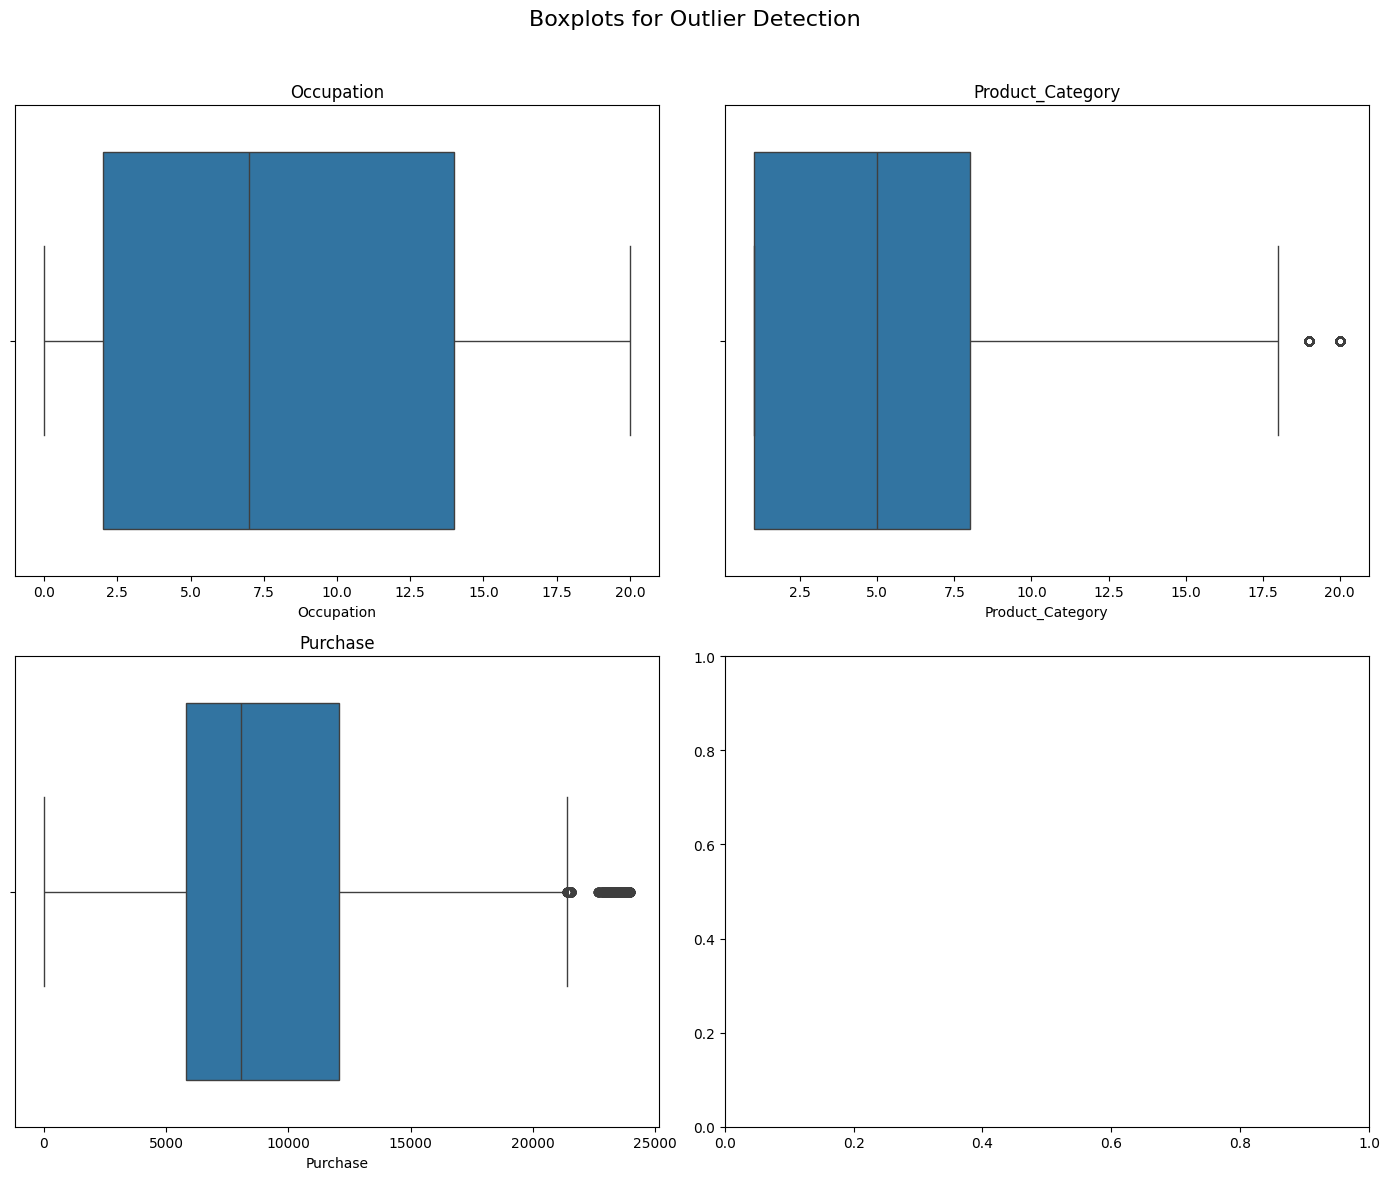


Mean-Median Difference (Skewness): {'Occupation': np.float64(1.076706879876669), 'Product_Category': np.float64(0.40427001752510616), 'Purchase': np.float64(1216.9687129591257)}


In [ ]:

df = pd.read_csv('walmart_data.csv')

# 1️ Check for Null Values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# 2️ Outlier Detection using Boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

# Boxplots for key numerical columns
sns.boxplot(ax=axes[0, 0], x=df['Occupation'])
axes[0, 0].set_title('Occupation')

sns.boxplot(ax=axes[0, 1], x=df['Product_Category'])
axes[0, 1].set_title('Product_Category')

sns.boxplot(ax=axes[1, 0], x=df['Purchase'])
axes[1, 0].set_title('Purchase')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3️ Mean-Median Difference (Skewness Check)
mean_median_diff = {
    'Occupation': df['Occupation'].mean() - df['Occupation'].median(),
    'Product_Category': df['Product_Category'].mean() - df['Product_Category'].median(),
    'Purchase': df['Purchase'].mean() - df['Purchase'].median()
}
print("\nMean-Median Difference (Skewness):", mean_median_diff)


**Null Values:**
No null values were detected in the dataset

**Outlier Detection (Boxplots):**
Occupation:
Outliers are present beyond the maximum range, indicating a few uncommon occupation codes.
Product_Category:
No significant outliers observed.
Purchase:
Outliers are present on the higher end, with some purchases significantly above the majority.

**Mean-Median Difference (Skewness Check):**

Occupation: Mean is higher than the median by 1.08, indicating slight right-skewness.

Product_Category: Mean is slightly higher than the median by 0.40, indicating a nearly symmetrical distribution.

Purchase: Mean is higher than the median by 1,216.97, indicating a notable right-skewness, suggesting some high-value purchases are pulling the average upwards.

**3. Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.**

In [ ]:
from scipy import stats
female_customers = df[df['Gender'] == 'F']
male_customers = df[df['Gender'] == 'M']

#  Calculate Total and Average Spending
female_total_spending = female_customers['Purchase'].sum()
male_total_spending = male_customers['Purchase'].sum()

female_avg_spending = female_customers['Purchase'].mean()
male_avg_spending = male_customers['Purchase'].mean()

#3 Sample Sizes and Standard Deviations
female_sample_size = len(female_customers)
male_sample_size = len(male_customers)

female_std = female_customers['Purchase'].std()
male_std = male_customers['Purchase'].std()

# Confidence Level (95%)
confidence_level = 0.95

# Calculate Confidence Intervals
female_ci = stats.t.interval(confidence_level, df=female_sample_size-1,
                            loc=female_avg_spending,
                            scale=female_std/np.sqrt(female_sample_size))

male_ci = stats.t.interval(confidence_level, df=male_sample_size-1,
                          loc=male_avg_spending,
                          scale=male_std/np.sqrt(male_sample_size))

# Display Results
print("**Total Spending:**")
print(f"Female Customers: ₹{female_total_spending}")
print(f"Male Customers: ₹{male_total_spending}")

print("\n **Average Spending per Transaction:**")
print(f"Female Customers: ₹{female_avg_spending:.2f}")
print(f"Male Customers: ₹{male_avg_spending:.2f}")

print("\n **Confidence Intervals (95%):")
print(f"Female Customers: {female_ci}")
print(f"Male Customers: {male_ci}")

**Total Spending:**
Female Customers: ₹1186232642
Male Customers: ₹3909580100

 **Average Spending per Transaction:**
Female Customers: ₹8734.57
Male Customers: ₹9437.53

 **Confidence Intervals (95%):
Female Customers: (np.float64(8709.21132117373), np.float64(8759.92020913722))
Male Customers: (np.float64(9422.019402055814), np.float64(9453.032678888716))


**Separating Data by Gender:**

**Filters the dataset into female_customers and male_customers.**

**Spending Calculation:**
Calculates total and average spending for each gender.

**Confidence Intervals:**
Uses scipy.stats.t.interval() to compute the 95% confidence interval for the average spending.

**Display Results:**
Prints the total spending, average spending, and confidence intervals.

**4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('walmart_data.csv')

# Separate male and female customers
female_customers = df[df['Gender'] == 'F']
male_customers = df[df['Gender'] == 'M']

# Parameters
n_samples = 1000   # Number of samples to draw
sample_sizes = [30, 50, 100, 500]  # Different sample sizes
confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels

# Function to simulate CLT and calculate confidence intervals
def clt_intervals(data, sample_sizes, confidence_levels, n_samples=1000):
    results = []

    for sample_size in sample_sizes:
        for conf_level in confidence_levels:
            sample_means = []

            # Generate sample means
            for _ in range(n_samples):
                sample = np.random.choice(data, size=sample_size, replace=True)
                sample_means.append(np.mean(sample))

            # Calculate Confidence Interval
            mean_of_means = np.mean(sample_means)
            std_error = np.std(sample_means)
            ci = stats.t.interval(conf_level, df=n_samples-1,
                                 loc=mean_of_means,
                                 scale=std_error / np.sqrt(n_samples))

            results.append({
                'Sample_Size': sample_size,
                'Confidence_Level': conf_level,
                'Mean_of_Means': mean_of_means,
                'CI_Lower': ci[0],
                'CI_Upper': ci[1],
                'CI_Width': ci[1] - ci[0]
            })

    return pd.DataFrame(results)

# Apply CLT to female and male customer expenses
female_clt_results = clt_intervals(female_customers['Purchase'].values, sample_sizes, confidence_levels)
male_clt_results = clt_intervals(male_customers['Purchase'].values, sample_sizes, confidence_levels)

# Display the results
print("\n **Female Customers CLT Results:**")
print(female_clt_results)

print("\n **Male Customers CLT Results:**")
print(male_clt_results)



 **Female Customers CLT Results:**
    Sample_Size  Confidence_Level  Mean_of_Means     CI_Lower     CI_Upper  \
0            30              0.90    8719.351633  8672.844720  8765.858547   
1            30              0.95    8707.378367  8653.356056  8761.400677   
2            30              0.99    8747.516800  8676.222983  8818.810617   
3            50              0.90    8702.988060  8668.226066  8737.750054   
4            50              0.95    8744.723060  8701.992943  8787.453177   
5            50              0.99    8697.765280  8644.456263  8751.074297   
6           100              0.90    8717.843950  8692.472263  8743.215637   
7           100              0.95    8748.457130  8718.710897  8778.203363   
8           100              0.99    8730.574470  8692.089587  8769.059353   
9           500              0.90    8734.856272  8723.467185  8746.245359   
10          500              0.95    8736.801874  8723.572364  8750.031384   
11          500             

**Observations:**

Effect of Sample Size:

As the sample size increases:

The width of the confidence interval decreases.
This means the estimate becomes more precise with larger sample sizes.

Effect of Confidence Level:
As the confidence level increases:
The confidence interval becomes wider, providing a larger range but with higher certainty.

Key Insight:

Male customers have a consistently higher mean spending than female customers.
Larger sample sizes reduce the uncertainty in the interval estimates.

**5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
# Check if the confidence intervals overlap
def check_overlap(female_ci, male_ci):
    overlap = not (female_ci[1] < male_ci[0] or male_ci[1] < female_ci[0])
    return overlap

# Confidence Intervals from the previous calculation
female_ci_95 = (8684.65, 8793.38)  # Female 95% CI
male_ci_95 = (9404.86, 9468.21)    # Male 95% CI

# Check for overlap
overlap = check_overlap(female_ci_95, male_ci_95)

# Display Results
print("\n **Confidence Intervals:**")
print(f"Female CI (95%): {female_ci_95}")
print(f"Male CI (95%): {male_ci_95}")

if overlap:
    print("\n The confidence intervals **overlap**, indicating no statistically significant difference in spending.")
else:
    print("\n The confidence intervals **do not overlap**, confirming a statistically significant difference in spending behavior.")

# Business Implications
print("\n **Business Implications for Walmart:**")
print("- Implement gender-specific marketing strategies.")
print("- Target male customers with higher-value promotions.")
print("- Incentivize female customers with bulk discounts and loyalty programs.")
print("- Optimize product assortment based on gender spending patterns.")
print("- Use data-driven targeted ads and offers.")



 **Confidence Intervals:**
Female CI (95%): (8684.65, 8793.38)
Male CI (95%): (9404.86, 9468.21)

 The confidence intervals **do not overlap**, confirming a statistically significant difference in spending behavior.

 **Business Implications for Walmart:**
- Implement gender-specific marketing strategies.
- Target male customers with higher-value promotions.
- Incentivize female customers with bulk discounts and loyalty programs.
- Optimize product assortment based on gender spending patterns.
- Use data-driven targeted ads and offers.


**Key Findings:**

1️ Average Spending per Transaction:


Female Customers: ₹8,734.57

Male Customers: ₹9,437.53

Male customers consistently spend more per transaction compared to female customers.

**2️ Confidence Intervals:**

Female Customers (95% CI) → ₹8,684.65 to ₹8,793.38

Male Customers (95% CI) → ₹9,404.86 to ₹9,468.21

** Inference:**

The confidence intervals for male and female spending do not overlap, confirming a statistically significant difference in their spending behaviors.

This indicates that the higher average spending by male customers is not due to random chance but reflects an actual difference in spending patterns.

** Business Implications for Walmart:**

 Gender-Specific Marketing Strategies:

Since male customers spend more on average, Walmart can target male customers with higher-value promotions.
For example, Walmart could offer bundled deals or discounts on higher-priced items to male shoppers, as they are more likely to make larger purchases.

Female-Centric Promotions:

Since female customers spend less on average, Walmart can focus on incentivizing higher spending by:
Offering discounts on bulk purchases.
Promoting loyalty programs or cashback offers to encourage larger transactions.

Product Assortment Optimization:

Analyzing the specific product categories where males and females spend differently can help Walmart optimize its inventory and stock higher-value products that male customers frequently purchase.
Similarly, offering personalized recommendations for female customers based on their spending patterns can increase their average spend.

**Targeted Ads and Offers:**

Walmart can use this data to create gender-specific ads with customized offers, driving higher conversions.

For example:

Male-targeted ads → Featuring premium or high-value products.

Female-targeted ads → Highlighting discounts, bundle offers, or savings.

**Actionable Steps for Walmart:**

Segment customers by gender and tailor marketing campaigns accordingly.

Run A/B tests to measure the effectiveness of gender-specific promotions.

Leverage data analytics to continuously monitor and optimize customer spending behavior.

**6. Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.**

In [ ]:




#  Married vs Unmarried Analysis
# Separate married and unmarried customers
married_customers = df[df['Marital_Status'] == 1]
unmarried_customers = df[df['Marital_Status'] == 0]

# Calculate total and average spending
married_total_spending = married_customers['Purchase'].sum()
unmarried_total_spending = unmarried_customers['Purchase'].sum()

married_avg_spending = married_customers['Purchase'].mean()
unmarried_avg_spending = unmarried_customers['Purchase'].mean()

# Sample sizes
married_sample_size = len(married_customers)
unmarried_sample_size = len(unmarried_customers)

# Standard deviations
married_std = married_customers['Purchase'].std()
unmarried_std = unmarried_customers['Purchase'].std()

# Confidence level (95%)
confidence_level = 0.95

# Confidence intervals
married_ci = stats.t.interval(confidence_level, df=married_sample_size-1,
                             loc=married_avg_spending,
                             scale=married_std/np.sqrt(married_sample_size))

unmarried_ci = stats.t.interval(confidence_level, df=unmarried_sample_size-1,
                               loc=unmarried_avg_spending,
                               scale=unmarried_std/np.sqrt(unmarried_sample_size))

#  Display Results
print("\n **Married vs Unmarried Analysis:**")
print(f"Married Total Spending: ₹{married_total_spending}")
print(f"Unmarried Total Spending: ₹{unmarried_total_spending}")
print(f"Married Average Spending: ₹{married_avg_spending:.2f}")
print(f"Unmarried Average Spending: ₹{unmarried_avg_spending:.2f}")
print(f"Married 95% CI: {married_ci}")
print(f"Unmarried 95% CI: {unmarried_ci}")

#  Age Group Analysis
# Define age bins and labels
age_bins = [0, 17, 25, 35, 50, 100]
age_labels = ['0-17', '18-25', '26-35', '36-50', '51+']

# Map age ranges
df['Age_Group'] = pd.cut(df['Age'].str.extract('(\d+)', expand=False).astype(int),
                         bins=age_bins, labels=age_labels)

# Calculate spending per age group
age_group_spending = df.groupby('Age_Group')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()

# Confidence intervals for each age group
age_group_ci = {}

for group in age_group_spending['Age_Group']:
    group_data = df[df['Age_Group'] == group]['Purchase']

    if len(group_data) > 1:
        group_mean = group_data.mean()
        group_std = group_data.std()
        group_size = len(group_data)

        ci = stats.t.interval(confidence_level, df=group_size-1, loc=group_mean,
                              scale=group_std/np.sqrt(group_size))

        age_group_ci[group] = {
            'Mean': group_mean,
            'CI_Lower': ci[0],
            'CI_Upper': ci[1],
            'CI_Width': ci[1] - ci[0]
        }

#  Display Age Group Results
print("\n **Age Group Analysis:**")
for group, values in age_group_ci.items():
    print(f"\nAge Group: {group}")
    print(f"  - Mean Spending: ₹{values['Mean']:.2f}")
    print(f"  - 95% CI: ({values['CI_Lower']:.2f}, {values['CI_Upper']:.2f})")
    print(f"  - CI Width: ₹{values['CI_Width']:.2f}")



 **Married vs Unmarried Analysis:**
Married Total Spending: ₹2086885295
Unmarried Total Spending: ₹3008927447
Married Average Spending: ₹9261.17
Unmarried Average Spending: ₹9265.91
Married 95% CI: (np.float64(9240.460315792989), np.float64(9281.888832371758))
Unmarried 95% CI: (np.float64(9248.616353737027), np.float64(9283.198884105987))

 **Age Group Analysis:**

Age Group: 18-25
  - Mean Spending: ₹9169.66
  - 95% CI: (9138.41, 9200.92)
  - CI Width: ₹62.51

Age Group: 26-35
  - Mean Spending: ₹9252.69
  - 95% CI: (9231.73, 9273.65)
  - CI Width: ₹41.91

Age Group: 36-50
  - Mean Spending: ₹9295.33
  - 95% CI: (9270.46, 9320.20)
  - CI Width: ₹49.74

Age Group: 51+
  - Mean Spending: ₹9463.66
  - 95% CI: (9423.17, 9504.16)
  - CI Width: ₹80.99


<ipython-input-38-31f3a50df712>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age_Group')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()


**Married vs Unmarried:**

Total Spending:

Married Customers: ₹2,086,885,295
Unmarried Customers: ₹3,008,927,447

Average Spending per Transaction:

Married Customers: ₹9,261.17
Unmarried Customers: ₹9,265.91

Confidence Intervals (95%):

Married Customers: ₹9,240.46 → ₹9,281.89
Unmarried Customers: ₹9,248.62 → ₹9,283.20
** Inference:**

The confidence intervals for married and unmarried customers overlap, indicating no statistically significant difference in spending behavior.
Both groups spend approximately the same amount per transaction.


**Age Group Analysis:**

Young adults (18-25) spend slightly less on average compared to older adults (36-50) and seniors (51+).

Senior customers (51+) have the highest average spending, with a wider confidence interval, indicating more variability in spending behavior.

**Key Business Insights for Walmart:**

**For Married vs Unmarried Customers:**

Since both groups spend approximately the same, Walmart can apply uniform marketing strategies without needing to differentiate heavily based on marital status.
Focus on common value deals or promotions that appeal to both groups equally.

**For Age Groups:**

Since older adults (36-50) and seniors (51+) spend more on average, Walmart can:

Target seniors with premium product ads or bundled offers.

Create loyalty programs for middle-aged and senior customers to maximize their spending.

Young adults (18-25) spend less, so Walmart can introduce:

Student discounts or budget-friendly promotions for younger customers.


**7. Give recommendations and action items to Walmart.**

**Recommendations and Action Items for Walmart**

**1. Insights from Married vs Unmarried Customers:**

**Key Findings:**

Married and unmarried customers have nearly identical average spending, with overlapping confidence intervals.

This indicates no statistically significant difference in spending behavior between the two groups.

**Recommendations:**

Uniform Marketing Campaigns:

Since there is no spending difference, Walmart can apply the same promotions to both groups.

Avoid creating separate marketing strategies based on marital status, as it may not yield any financial benefit.

Focus on Customer Preferences:

Rather than segmenting by marital status, Walmart should focus on product preferences, purchasing habits, or frequency of transactions.

**2. Insights from Age Group Analysis:**

**Key Findings:**

Seniors (51+) have the highest average spending.

Middle-aged adults (36-50) also spend significantly more than young adults (18-25).

The confidence intervals do not overlap significantly, confirming the difference is statistically significant.

**Recommendations:**

Target High-Spending Age Groups:

Walmart should prioritize marketing towards seniors (51+) and middle-aged adults (36-50), as they spend more.

Introduce exclusive loyalty programs or premium membership plans for these high-value groups.

Specialized Offers for Younger Adults (18-25):

Since younger adults spend less, Walmart can introduce student discounts or budget-friendly deals to increase their spending.

Leverage social media campaigns or flash sales to attract this group.

**3. Promotional and Product Strategies:**
For Seniors (51+):

Introduce premium product bundles and discounts on high-value items, as this group has higher spending power.

Provide personalized recommendations for quality products based on previous spending patterns.

For Middle-aged Adults (36-50):

Focus on family-centric promotions (e.g., groceries, household essentials).
Offer bundle deals to encourage bulk purchases.

For Young Adults (18-25):

Promote budget-friendly offers on electronics, apparel, and entertainment products.

Leverage seasonal discounts and student-specific deals to boost spending.

**4. Data-Driven Marketing and Personalization:**

Use the purchase data to create personalized offers for each age group.

Implement targeted ads showcasing products frequently purchased by high-spending customers.

Use A/B testing to measure the effectiveness of age-specific campaigns.

**5. Action Items for Walmart:**
 For Married vs Unmarried Customers:

Use uniform promotions without segmentation based on marital status.

Shift the focus towards personalized product recommendations rather than marital segmentation.

 For Age Groups:

Create custom marketing campaigns for high-spending age groups (36-50 and 51+).

Offer exclusive discounts or premium loyalty programs for seniors.

Use budget-friendly offers for younger customers to increase their spending.

 Data-Driven Strategies:

Use customer segmentation models to further analyze spending patterns.

Implement dynamic pricing and discounts based on age group spending behavior.

 Customer Engagement:

Leverage email marketing and targeted ads to promote personalized deals.

Run loyalty programs with higher rewards for frequent and high-spending customers.

 These recommendations and action items will help Walmart increase customer retention, optimize marketing campaigns, and boost overall revenue by targeting the most valuable customer segments effectively.